In [10]:
import plotly.graph_objects as go
from ipywidgets import Output, VBox

# Create a FigureWidget
fig = go.FigureWidget(data=[go.Bar(x=[1, 2, 3], y=[4, 5, 6])])

# Prepare Output to capture the clicks
out = Output()
@out.capture(clear_output=True)
def handle_click(trace, points, state):
    # Handle the click event
    print(f"Clicked on point index: {points.point_inds[0]}")

# Attach the on_click handler to the trace
fig.data[0].on_click(handle_click)

# Display the FigureWidget and Output
VBox([fig, out])


    'data': [{'type': 'bar', 'uid': 'f4e913f5-9f26-4cf1-80b7-d70a75765c17', 'x':…

In [11]:
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

x = np.random.rand(100)
y = np.random.rand(100)

f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])

scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    print(scatter)
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s


scatter.on_click(update_point)
# f
f_json = f.to_json()
# test if opening mode is correct (w+ or w+b)
with open('plot.json', 'w') as fd:
    fd.write(f_json)


In [54]:
import plotly.graph_objects as go
import plotly.express as px
# Sample data
data = {
    'lat': [37.7749,37.7749, 34.0522, 40.7128],
    'lon': [-122.4194,-122.4194, -118.2437, -74.0060],
    'city': ['San Francisco1','San Francisco2', 'Los Angeles', 'New York'],
    'population': [883305,9000, 3999759, 8398748]
}


# Create a scattermapbox
fig = go.Figure(go.Scattermap(
    lat=data['lat'],
    lon=data['lon'],
    mode='markers+text',
    # marker=go.scattermapbox.Marker(size=20),
    marker=dict(size=16),
    text=data['city'],  # Use the population data as text labels
    textposition='top center',  # Position the text labels
    hoverinfo='text',  # Show text on hover
))

# Set the layout for the map
# fig.update_layout(
#     mapbox=dict(
#         style="carto-positron",
#         # center=go.layout.mapbox.Center(
#         #     lat=37.7749,
#         #     lon=-95.7129
#         # ),
#         center={'lat': data['lat'][0], 'lon': data['lon'][0]},
#         zoom=18,
#     ),
#     margin={"r":0,"t":0,"l":0,"b":0},
#     title='City Populations'
# )
fig.update_layout(
    map=dict(
        style="carto-positron",
        center={'lat': data['lat'][0], 'lon': data['lon'][0]},
        zoom=18,
    ),
    margin={"r":0,"t":0,"l":0,"b":0},
    title='City Populations'
)
# fig.update_traces(marker=dict(color='blue', size=20), textfont=dict(size=16, color='black'))
fig.update_layout(scattermode="group", scattergap=0.5)
fig.show()


In [48]:
# SCATTERMODE GROUP AND GAP DON'T WORK FOR SCATTERMAP (MAPBOX)

import plotly.express as px
import pandas as pd
# Load sample data
df = px.data.medals_long()
df.loc[3, "count"] = 24
# df.loc[df["nation"] == "South Korea"]

# # Create scatter plot
fig = px.scatter(df, y="count", x="nation", color="medal")


# # Update layout to group scatter points
fig.update_traces(marker_size=10)
fig.update_layout(scattermode="group", scattergap=0.9)
fig.layout.title.text = "some text"
# # Show plot
fig.show()

# df.groupby(['nation', 'medal'], as_index=False).head()
# df.sort_values(['nation', 'medal'])
# df.loc[df['nation']]

-122.419404

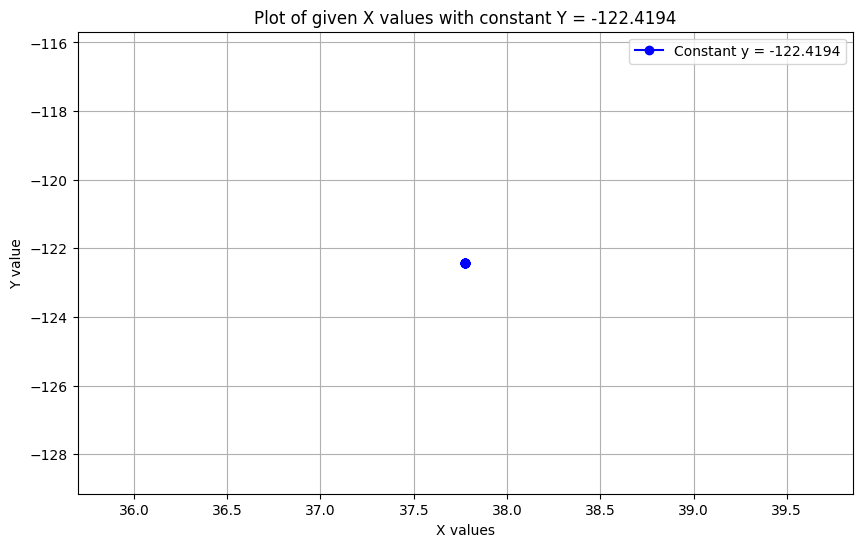

In [ ]:
import math
import plotly.graph_objects as go
import plotly.express as px
# Sample data
# data = {
#     'lat': [37.7749,37.7749,],
    # 'lon': [-122.4194,-122.4204,],
    # 'city': ['San Francisco1','San Francisco2', 'Los Angeles', 'New York'],
    # 'population': [883305,9000, 3999759, 8398748]
# }

data = {
    'lat': [37.7749 for i in range(20)],
    'lon': [-122.4194 for i in range(20)],
    # 'city': ['San Francisco1','San Francisco2', 'Los Angeles', 'New York'],
    # 'population': [883305,9000, 3999759, 8398748],
}

import matplotlib.pyplot as plt

# Define the x-values
x_values = data['lat']
y_values = data['lon']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'bo-', label='Constant y = -122.4194')
plt.xlabel('X values')
plt.ylabel('Y value')
plt.title('Plot of given X values with constant Y = -122.4194')
plt.legend()
plt.grid(True)
# plt.show()


# data['lat'] = [lat + for x in data['lat']]
# print(min_lat(data['lat'][0]))

# Create a scattermapbox
fig = go.Figure(go.Scattermap(
    lat=data['lat'],
    lon=data['lon'],
    mode='markers+text',
    # marker=go.scattermapbox.Marker(size=20),
    marker=dict(size=16),
    # text=data['city'],  # Use the population data as text labels
    textposition='top center',  # Position the text labels
    # hoverinfo='text',  # Show text on hover
))

fig.update_layout(
    map=dict(
        style="carto-positron",
        center={'lat': data['lat'][0], 'lon': data['lon'][0]},
        zoom=16,
    ),
    margin={"r":0,"t":0,"l":0,"b":0},
    title='City Populations'
)
# fig.update_traces(marker=dict(color='blue', size=20), textfont=dict(size=16, color='black'))
fig.update_layout(scattermode="group", scattergap=0.5)
# fig.show()

# radius constant
R = 0.001
# max_lat = lat + 0.001
# min_lat = lat - 0.001
# max_lon = lon + 0.001
# min_lon = lon - 0.001

# distâncias limite: -sqrt(radius-x^2) to sqrt(radius-x^2)
# x = lon between (min_lon, max_lon); min_lon = -(lon + radius), max_lon = lon + radius
# circ eq + coordinates
# max_lat = lambda lat, lon, x, radius=0.001: lat - math.sqrt(radius - (x + lon)**2)
# min_lat = lambda max_lat: -max_lat
# print(max_lat(data['lat'][0], data['lon'][0], -data['lon'][0]))

# foo = [x for x in enumerate(data[])]

# actual radius based on length of overlapping markers
# radius = len(data['lon']) * R
center_lon = data['lon'][0]
max_lon = center_lon + R
min_lon = center_lon
for i, lon in enumerate(data['lon']):
    data['lon'][i] += R * i

# f(x)=-2+sqrt(1-(x+10)^(2))
# math.sqrt(center_lon - data['lon'][0]**2)
# center_lat - R + math.sqrt(R - (center_lon + data['lon'][0])**2)
# center_lon - data['lon'][0]**2

# WIP
# double check equation below
center_lat - R + math.sqrt(R - (center_lon + data['lon'][0])**2)

# for i, lat in enumerate(data['lat']):
    # x between lon - radius and lon + radius
    # print(f'radius: {radius};\n new lat: {radius - data['lon'][i]**2}\
            # new lon: {}')
    # data['lat'][i] = math.sqrt(radius - data['lon'][i]**2)